In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
data=pd.read_csv("datasets/airfoil_self_noise.csv")
data.head()

,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement,Sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
Frquency(Hz)            1503 non-null int64
Angle_of_Attack         1503 non-null float64
Chord_Length            1503 non-null float64
Free_stream_velocity    1503 non-null float64
Displacement            1503 non-null float64
Sound_pressure_level    1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


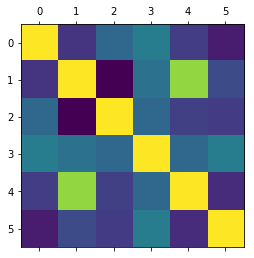

In [11]:
plt.matshow(data.corr())
plt.show()

In [14]:
X_train, X_test, Y_train, Y_test=train_test_split(data.drop(['Sound_pressure_level'], axis=1), 
                                                  data['Sound_pressure_level'], test_size=0.2, random_state=30)

In [18]:
model=LinearRegression(normalize=True)
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [32]:
pred=model.predict(X_test)

In [33]:
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.5361735507608868
0.41120576097466655


In [22]:
model.coef_

array([-1.36371063e-03, -4.56431689e-01, -3.59721113e+01,  1.12892553e-01,
       -1.40744311e+02])

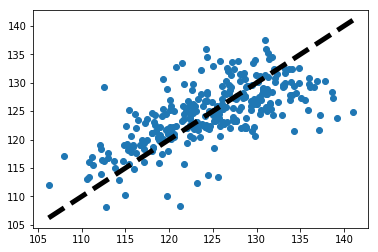

In [36]:
fig, ax=plt.subplots()
ax.scatter(Y_test, pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=5)

In [43]:
X_train, X_test, Y_train, Y_test=train_test_split(data.drop(['Sound_pressure_level'], axis=1), 
                                                  np.log10(data['Sound_pressure_level']), test_size=0.2, random_state=50)

In [44]:
model=LinearRegression(normalize=True)
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [45]:
pred_new=model.predict(X_test)

In [46]:
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.5228168908584401
0.5118884703821522


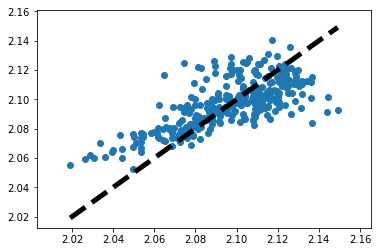

In [47]:
fig, ax=plt.subplots()
ax.scatter(Y_test, pred_new)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=5)